# ITCS 6010: Assignment #1 (v3)  

<font color="red">(Due: 11 pm on Sep 26th) </font>

**Submitted by : Aaroh Mathur (801076696)**

### 1. [Softmax] Show that in the case of two actions, the softmax operation using the Gibbs distribution becomes the logistic, or sigmoid, function commonly used in artificial neural networks. What effect does the temperature parameter have on the function? 

First lets see the defination of Gibbs Distribution.

**Gibbs Distribution (also known as Boltzmann distribution)**

This ditribution is a probability distribution or probability measure that gives the probability that a system will be in a certain state as a function of that state's energy and the temperature of the system.

$$p_{i} \propto e^{\frac{-\varepsilon_{i}}{kT}}$$

where $p_{i}$ is the probability of the system being in state $i$, $\varepsilon_{i}$ is the energy of that state, and a constant $kT$ of the distribution is the product of Boltzmann's constant $k$ and thermodynamic temperature $T$. The symbol $\propto$ denotes proportionality.

The Distribution can be formulated as:

$$ p_{i}=\frac{1}{Q}e^{\frac{-\varepsilon_{i}}{kT}}=\frac{e^{\frac{-\varepsilon_{i}}{kT}}}{\sum_{j=1}^{M} {e^{\frac{-\varepsilon_{j}}{kT}}}}$$

Lets assume the two actions $ A={a, b} $. Given these two actions the probabilities calculated are:
$$
\frac{e^{a / \tau}}{e^{a / \tau}+e^{b / \tau}} \quad \text { and } \quad \frac{e^{b / \tau}}{e^{a / \tau}+e^{b / \tau}}
$$

Multiplying $ {e^{-a / \tau}} $ with the first expression's numerator and denominator, We get
$$
\frac{1}{1+e^{(b-a) / \tau}}
$$

which forms the defination of softmax function. The temperature $\tau$ here plays the role of how quickly the incoming signal is “squashed”. The larger $\tau$ is the more quickly the function squashes its inputs and the distribution becomes uniform.


### 2. If the step-size parameters, $\alpha_k$, are not constant, then the estimate $Q_k$ is a wighted average of previously received rewards with a weighting different from that given by (2.6) in p32. What is the weighting on each prior reward for the general case?  

The increamental update rule for updating an average $Q_{k}$ of the $k-1$ past rewards is modified to be

$
Q_{k} \doteq Q_{k-1}+\alpha\left[R_{k-1}-Q_{k-1}\right]
$

Now from this equation we can calculate the weighted average of past rewards for the general case where step-size parameter, $\alpha_k$ are not constant

$
$\begin{aligned} Q_{k} &=Q_{k-1}+\alpha_{k}\left(r_{k}-Q_{k-1}\right) \\ &=\alpha_{k} r_{k}+\left(1-\alpha_{k}\right) Q_{k-1} \\ &=\alpha_{k} r_{k}+\left(1-\alpha_{k}\right)\left[\alpha_{k-1} r_{k-1}+\left(1-\alpha_{k-1}\right) Q_{k-2}\right] \\ &=\alpha_{k} r_{k}+\left(1-\alpha_{k}\right) \alpha_{k-1} r_{k-1}+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right) Q_{k-2} \\ &=\alpha_{k} r_{k}+\left(1-\alpha_{k}\right) \alpha_{k-1} r_{k-1}+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right)\left[\alpha_{k-2} r_{k-2}+\left(1-\alpha_{k-2}\right) Q_{k-3}\right] \\ &=\alpha_{k} r_{k}+\left(1-\alpha_{k}\right) \alpha_{k-1} r_{k-1}+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right) \alpha_{k-2} r_{k-2} \\ &+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right)\left(1-\alpha_{k-2}\right) Q_{k-3} \\ &= \cdots \\ &=\alpha_{k} r_{k}+\left(1-\alpha_{k}\right) \alpha_{k-1} r_{k-1}+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right) \alpha_{k-2} r_{k-2}+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right)\left(1-\alpha_{k-2}\right) \cdots\left(1-\alpha_{3}\right) \alpha_{2} r_{2}+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right)\left(1-\alpha_{k-2}\right) \cdots\left(1-\alpha_{2}\right) \alpha_{1} r_{1}+\left(1-\alpha_{k}\right)\left(1-\alpha_{k-1}\right)\left(1-\alpha_{k-2}\right) \cdots\left(1-\alpha_{2}\right)\left(1-\alpha_{1}\right) Q_{0} \end{aligned}$
$

$
\text { Thus in the general case the weight on the prior reward } Q_{0} \text { is given by } \prod_{i=1}^{k}\left(1-\alpha_{i}\right)
$

### 3. What is the Bellman equation for action values, for $Q^\pi$? It must give the action value $Q^\pi(s,a)$ in terms of the action values, $Q^\pi(s^\prime, a^\prime)$, of possible successors to the state-action pair $(s,a)$. Show the sequence of equations analogous to (3.14), but for action values.  

Lets derive the Bellman equation in terms of $Q^\pi$ considering the state-action pair $(s, a)$

We know that,
$$
\begin{aligned} Q^{\pi}(s, a) &=E_{\pi}\left\{R_{t} | s_{t}=s, a_{t}=a\right\} \\ &=E_{\pi}\left\{\sum_{k=0}^{\infty} \gamma^{k} r_{t+k+1} | s_{t}=s, a_{t}=a\right\} \end{aligned}
$$

Lets include the $s^\prime$ which the environment puts the agent into once action $a$ is taken on state $s$

$$
Q^{\pi}(s, a)=\sum_{s^{\prime}} E_{\pi}\left\{\sum_{k=0}^{\infty} \gamma^{k} r_{t+k+1} | s_{t}=s, a_{t}=a, s_{t+1}=s^{\prime}\right\} P\left\{s_{t+1}=s^{\prime} | s_{t}=s, a_{t}=a\right\}
$$


$
\begin{array}{l}{\text {Changing notation by introducing } P_{s, s^{\prime}}^{a} \text { as the second probability factor above, releasing the }}\\ {k=0 \text { term, and factoring out a } \gamma \text { in the second summation we find that we now have } Q^{\pi}(s, a)} \\ {\text { given by }}\end{array}
$

$$
\begin{aligned} Q^{\pi}(s, a) &=\sum_{s^{\prime}} E_{\pi}\left\{r_{t+1} | s_{t}=s, a_{t}=a, s_{t+1}=s^{\prime}\right\} P_{s, s^{\prime}}^{a} \\ &+\gamma \sum_{s^{\prime}} E_{\pi}\left\{\sum_{k=0}^{\infty} \gamma^{k} r_{t+k+2} | s_{t}=s, a_{t}=a, s_{t+1}=s^{\prime}\right\} P_{s, s^{\prime}}^{a} \end{aligned}
$$

$
\begin{array}{l}{\text {Introducing } R_{s, s^{\prime}}^{a} \text { in the first expectation above and the fact that we assuming Markov }} {\text {states the above becomes }} \end{array}
$
$$
{\qquad Q^{\pi}(s, a)=\sum_{s^{\prime}} R_{s, s^{\prime}}^{a} P_{s, s^{\prime}}^{a}+\gamma \sum_{s^{\prime}} E_{\pi}\left\{\sum_{k=0}^{\infty} \gamma^{k} r_{t+k+2} | s_{t+1}=s^{\prime}\right\} P_{s, s^{\prime}}^{a}}
$$

We now use the conditional expectation theorem again this time on the expectation termconditioning on the possible actions we can take from state $s^\prime$. We have

$$
\begin{aligned} E_{\pi}\left\{\sum_{k=0}^{\infty} \gamma^{k} r_{t+k+2} | s_{t+1}=s^{\prime}\right\} &=E_{\pi}\left\{R_{t+1} | s_{t+1}=s^{\prime}\right\} \\ &=\sum_{a^{\prime}} E_{\pi}\left\{R_{t+1} | s_{t+1}=s^{\prime}, a_{t+1}=a^{\prime}\right\} P\left\{a_{t+1}=a^{\prime} | s_{t+1}=s^{\prime}\right\} \\ &=\sum_{a^{\prime}} E_{\pi}\left\{R_{t+1} | s_{t+1}=s^{\prime}, a_{t+1}=a^{\prime}\right\} \pi\left(s^{\prime}, a^{\prime}\right) \\ &=\sum_{a^{\prime}} Q^{\pi}\left(s^{\prime}, a^{\prime}\right) \pi\left(s^{\prime}, a^{\prime}\right) \end{aligned}
$$

$
\begin{array}{l}{\text { When this is substituted into the expression for } Q^{\pi}(s, a) \text { we obtain }}\end{array}
$
$$
{\qquad Q^{\pi}(s, a)=\sum_{s^{\prime}} R_{s, s^{\prime}}^{a} P_{s, s^{\prime}}^{a}+\gamma \sum_{s^{\prime}} \sum_{a^{\prime}} Q^{\pi}\left(s^{\prime}, a^{\prime}\right) \pi\left(s^{\prime}, a^{\prime}\right) P_{s, s^{\prime}}^{a}}
$$



### 4. The Bellman equation (3.4) must hold for each state for the value function $V^\pi$ showin Figure 3.2 (p60). Show numerically that this equation holds for the center state, valued at +0.7, with respect to its four neighboring states, valued at +2.3, +0.4, -0.4, and +0.7. (These numbers are accurate only to one decimal place.) 


We want to check that at the center state we have equality in Bellman's equation. Since  the left hand side is given by $V^{\pi}(s)=+0.7$ we check that the right hand side is equal to this. Letting the letters $u, d, l,$ and $r$ denote the squares to the up, down, left, and right respectively we see that the right hand side of Bellman's equation is given by

$$
\begin{aligned} & \pi(s, a=u) \sum_{s^{\prime}} P_{s, s^{\prime}}^{a=u}\left(R_{s, s^{\prime}}^{a=u}+\gamma V^{\pi}\left(s^{\prime}\right)\right)+\pi(s, a=r) \sum_{s^{\prime}} P_{s, s^{\prime}}^{a=r}\left(R_{s, s^{\prime}}^{a=r}+\gamma V^{\pi}\left(s^{\prime}\right)\right) \\+& \pi(s, a=d) \sum_{s^{\prime}} P_{s, s^{\prime}}^{a=d}\left(R_{s, s^{\prime}}^{a=d}+\gamma V^{\pi}\left(s^{\prime}\right)\right)+\pi(s, a=l) \sum_{s^{\prime}} P_{s, s^{\prime}}^{a=l}\left(R_{s, s^{\prime}}^{a=l}+\gamma V^{\pi}\left(s^{\prime}\right)\right) \\=& \frac{1}{4}\left(R_{s, s^{\prime}=u}^{a=u}+\gamma V^{\pi}\left(s^{\prime}=u\right)\right)+\frac{1}{4}\left(R_{s, s^{\prime}=r}^{a=r}+\gamma V^{\pi}\left(s^{\prime}=r\right)\right) \\+& \frac{1}{4}\left(R_{s, s^{\prime}=d}^{a=d}+\gamma V^{\pi}\left(s^{\prime}=d\right)\right)+\frac{1}{4}\left(R_{s, s^{\prime}=l}^{a}+\gamma V^{\pi}\left(s^{\prime}=l\right)\right) \end{aligned}
$$

This is because $R=0$ for all of the these steps the above becomes
$$
\begin{aligned} & \frac{\gamma}{4}\left(V^{\pi}\left(s^{\prime}=u\right)+V^{\pi}\left(s^{\prime}=r\right)+V^{\pi}\left(s^{\prime}=d\right)+V^{\pi}\left(s^{\prime}=l\right)\right) \\=& \frac{0.9}{4}(2.3+0.4-0.4+0.7)=\frac{2.7}{4} \approx 0.7 \end{aligned}
$$

to the accuracy of the numbers given.

### 5. In Example 4.1 (p76), suppose a new state 15 is added to the gridworld just below state 13, and its actions, *left*, *up*, *right*, and *down*, take the agent  12,13,14, and 15, respecively. Assume that the transitions from the original states ae unchanged. What, then, is $V^\pi(15)$ for the equiprobable random policy? 

Given the assumption, it means that the state-value function values do not change for the original grid locations when this newly added state is appended.

Therefore now we can use the Equation 4.5 to obtain the state value function for this new state $V^\pi(15)$. We find that

Action set ${l, u, r, d}$ as left, up, right and down
$$
\begin{aligned} V^{\pi}(15) &=\sum_{a} \pi(15, a) \sum_{s^{\prime}} P_{15, s^{\prime}}^{a}\left(R_{15, s^{\prime}}^{a}+\gamma V\left(s^{\prime}\right)\right) \\ &=\frac{1}{4}\left(R_{15,12}^{\mathrm{l}}+\gamma V(12)+R_{15,13}^{\mathrm{u}}+\gamma V(13)\right.\\ &\left.+R_{15,14}^{\mathrm{r}}+\gamma V(14)+R_{15,15}^{\mathrm{d}}+\gamma V(15)\right) \end{aligned}
$$

Subsituting values of $V^\pi$ as given by Figure 4.2

$$
\begin{aligned} V^{\pi}(15) &=\frac{1}{4}(-1-22 \gamma-1-20 \gamma-1-\gamma 14-1+\gamma V(15)) \\ &=-1-14 \gamma+\frac{\gamma}{4} V(15) \end{aligned}
$$

Finally after solving for $V(15)$ we get 

$$
V(15)=-\frac{4(1+14 \gamma)}{4-\gamma}
$$

If we take $\gamma = 0.99$ then we find $V(15) = -19.74$

### 6. Derive the weighted-average update rule (5.8) from (5.7) (p109). Follow the pattern of the derivation of the unweighted rule (2.3).  

Given Equation 
$$
V_{n}=\frac{\sum_{k=1}^{n} w_{k} R_{k}}{\sum_{k=1}^{n} w_{k}}
$$

Recursive formula can be derived for $V_n$ by incrementing $n$ by one to get $V_{n+1}$ and separating the last $w_{n+1}$

$$
V_{n+1}=\frac{\sum_{k=1}^{n+1} w_{k} R_{k}}{\sum_{k=1}^{n+1} w_{k}}
$$

$$
=\frac{\sum_{k=1}^{n} w_{k}}{\sum_{k=1}^{n+1} w_{k}}\left(\frac{\sum_{k=1}^{n} w_{k} R_{k}}{\sum_{k=1}^{n} w_{k}}\right)+\left(\frac{w_{n+1}}{\sum_{k=1}^{n+1} w_{k}}\right) R_{n+1}
$$

Let $W_n = \sum_{k=1}^{n}{w_k}$, we can rewrite the above equation as
$$
V_{n+1}=\frac{W_{n}}{W_{n+1}} V_{n}+\frac{w_{n+1}}{W_{n+1}} R_{n+1}
$$

Now $W_n$ can be written as $W_{n+1} - w_{n+1}$, The fraction $\frac{W_n}{W_{n+1}}$ becomes $1 - \frac{w_{n+1}}{W_{n+1}}$.

Now $V_{n+1}$ can be represented as

$$
\begin{aligned} V_{n+1} &=V_{n}-\frac{w_{n+1}}{W_{n+1}} V_{n}+\frac{w_{n+1}}{W_{n+1}} R_{n+1} \\ &=V_{n}-\frac{w_{n+1}}{W_{n+1}}\left(R_{n+1}-V_{n}\right) \end{aligned}
$$


### 7. 
###  1) Modify the algorithm for first-visit MC policy evaluation (Figure 5.1)  to use the incremental implementation for stationary averages. <br/>


$
\begin{array}{l}{\text { Input: a policy } \pi \text { to be evaluated }} \\ {\text { Initialize: }} \\ {\qquad V(s) \in \mathbb{R}, \text { arbitrarily, for all } s \in \mathcal{S}} \\ {\qquad \begin{array}{l} {\text {Returns }(s) \leftarrow \text { an empty list, for all } s \in \mathcal{S}} \\ {N(s) \text { Visit counter for all } s \in \mathcal{S}}\end{array}}\end{array}
$
<br>
<br>
$
\begin{array}{l}{\text { Loop forever (for each episode): }} \\ {\begin{array}{l}{\qquad \text {Generate an episode following } \pi : S_{0}, A_{0}, R_{1}, S_{1}, A_{1}, R_{2}, \ldots, S_{T-1}, A_{T-1}, R_{T}} \\ {\qquad G \leftarrow 0} \\ {\qquad \text {Loop for each step of episode, } t=T-1, T-2, \ldots, 0 :} \\ {\qquad \qquad {G \leftarrow \gamma G+R_{t+1}} \\ {\qquad \qquad \text {Unless } S_{t} \text { appears in } S_{0}, S_{1}, \ldots, S_{t-1} :} \\ {\qquad \qquad \qquad N(s) \leftarrow N(s) + 1 \text { Increment the state count }} \\  {\qquad \qquad \qquad V\left(S_{t}\right) \leftarrow V(S_t) + \frac{(G - V(S))}{N(s)}}}\end{array}}\end{array}
$

###  2) (Programming) Using first-vist MC PE, write the pseudocode for the policy iteration before writing in Python. Apply the incremental version to OpenAI Gym BlackJack-V0. 

$
\begin{array}{l}{\text { Initialize: }} \\ {\qquad \begin{array}{l}{\pi(s) \in \mathcal{A}(s) \text { (arbitrarily), for all } s \in \mathcal{S}} \\ {Q(s, a) \in \mathbb{R} \text { (arbitrarily), for all } s \in \mathcal{S}, a \in \mathcal{A}(s)} \\ {\text {Returns }(s, a) \leftarrow \text { empty list, for all } s \in \mathcal{S}, a \in \mathcal{A}(s)}\end{array}}\end{array}
$

<br>

$
\begin{array}{l}{\text { Loop forever (for each episode): }} \\ {\qquad \begin{array}{l}{\text {Choose } S_{0} \in \mathcal{S}, A_{0} \in \mathcal{A}\left(S_{0}\right) \text { randomly such that all pairs have probability }>0} \\ {\text {Generate an episode from } S_{0}, A_{0}, \text { following } \pi : S_{0}, A_{0}, R_{1}, \ldots, S_{T-1}, A_{T-1}, R_{T}} \\ { G \leftarrow 0} \\ {\text { Loop for each step of episode, } t=T-1, T-2, \ldots, 0 :} \\ {\qquad G \leftarrow \gamma G+R_{t+1}} \\ {\qquad \text {Unless the pair } S_{t}, A_{t} \text { appears in } S_{0}, A_{0}, S_{1}, A_{1} \ldots, S_{t-1}, A_{t-1} :} \\ {\qquad \text{Append $G$ to $Returns(S_t, A_t)$}} \\ {\qquad Q(S_t, A_t) \leftarrow average(Returns(S_t, A_t))} \\ {\qquad \pi(S_t) \leftarrow argmax_aQ(S_t, a)} \end{array}}\end{array}
$



### First Visit MC Policy Iteration (Incremental Version)

In [36]:
%matplotlib inline
import gym
import matplotlib
import numpy as np
import sys
from collections import defaultdict
import gym
from gym import spaces
from gym.utils import seeding

In [37]:
env = gym.make('Blackjack-v0')

In [38]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [39]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=0.99, epsilon=0.1):
    
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all (state, action) pairs we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        for state, action in sa_in_episode:
            sa_pair = (state, action)
            # Find the first occurance of the (state, action) pair in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode)
                                       if x[0] == state and x[1] == action)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])

            returns_count[sa_pair] += 1.0
            Q[state][action] = Q[state][action] + (G - Q[state][action]) / returns_count[sa_pair]
        
        # The policy is improved implicitly by changing the Q dictionary
    
    return Q, policy

In [40]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=50000, epsilon=0.01)

Episode 50000/50000.

In [41]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
V

defaultdict(float,
            {(16, 6, False): -0.04545454545454548,
             (15, 5, True): -0.06577962711864413,
             (18, 5, True): 0.12307692307692306,
             (19, 9, True): 0.5205479452054795,
             (20, 4, False): 0.6653061224489792,
             (19, 1, False): -0.07222222222222222,
             (14, 9, False): -0.37322322738386327,
             (20, 8, True): 0.7272727272727271,
             (19, 5, False): 0.482658959537572,
             (21, 7, True): 0.9349999999999999,
             (13, 10, False): -0.4025573378839591,
             (17, 2, True): -0.16499999999999998,
             (17, 10, False): -0.4664931685100844,
             (20, 10, False): 0.4251851851851854,
             (21, 1, True): 0.6210045662100452,
             (12, 3, False): -0.2740822523364484,
             (18, 7, False): 0.4447439353099732,
             (11, 3, False): 0.11270345320197046,
             (17, 5, False): -0.0361111111111111,
             (12, 10, False): -0.425102

### Test the policy obtained

In [8]:
countwins = 0
num_episodes=10
for i_episode in range(1, num_episodes + 1):
    # Print out which episode we're on, useful for debugging.
    if i_episode % 1000 == 0:
        print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
        sys.stdout.flush()

    # Generate an episode.
    # An episode is an array of (state, action, reward) tuples
    episode = []
    state = env.reset()
    print('NEW GAME--------------')

    for t in range(100):
        probs = policy(state)
        action = np.random.choice(np.arange(len(probs)), p=probs)
        
        next_state, reward, done, _ = env.step(action)
        print(probs, state, reward, next_state, done)
        episode.append((state, action, reward))
        if done:
            print('DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
            if reward == 1:
                countwins += reward
            break
        state = next_state

NEW GAME--------------
[0.995 0.005] (20, 7, False) 1.0 (20, 7, False) True
DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
NEW GAME--------------
[0.995 0.005] (19, 10, False) 1.0 (19, 10, False) True
DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
NEW GAME--------------
[0.005 0.995] (13, 5, False) -1 (23, 5, False) True
DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
NEW GAME--------------
[0.005 0.995] (6, 8, False) 0 (10, 8, False) False
[0.005 0.995] (10, 8, False) 0 (19, 8, False) False
[0.995 0.005] (19, 8, False) -1.0 (19, 8, False) True
DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
NEW GAME--------------
[0.995 0.005] (21, 8, True) 1.0 (21, 8, True) True
DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
NEW GAME--------------
[0.005 0.995] (11, 10, False) 0 (13, 10, False) False
[0.005 0.995] (13, 10, False) -1 (22, 10, False) True
DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
NEW GAME--------------
[0.995 0.005] (21, 1, True)

In [9]:
countwins

17.0

### 8. (Programming) Implement Policy Iteration (DP) and compare its performance with the incremental first-visit MC policy iteration that you have implemented in 7 to solve the following GridWorld environment.  


#### Maze Problem (Practice)

In [10]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import warnings
from operator import add
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [11]:
%%bash 
cat grid.txt

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO


### GridWorld Class


In [12]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point.

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
                grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        #print('c:',s)
        if isinstance(s, collections.Iterable) and len(s) == 2:
            #print('HI', isinstance(s, collections.Iterable))
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
                #print("NOT POSSIBLE")
                return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            #print("HI")
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = list(map(add, self._s, self._actions[a]))# CHANGE IN CODE - BUG FIX
        # state transition
        curr = self.check_state(s1)
        #print(s1, 'IN NEXT')
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
           
    def get_actions(self):
        return self._actions
    
    # Added a helper function in the environment to generate list of states
    def get_state_list(self):
        
        self.statelist = []
        for i in range(self._size[0]):
            for j in range(self._size[1]):
                self.statelist.append([i, j])

In [13]:
env = GridWorld("grid.txt")
env.print_map()
env.get_state_list()
print(env._size)

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]
[7 9]


In [14]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

# DP Based Policy Iteration

### Policy Evaluation

In [15]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.01):
    
    # Start with a random (all 0) value function
    total_states = env._size[0] * env._size[1]
    V = np.zeros([env._size[0], env._size[1]])
    ct = 0
    deltalist = [0]
    while True:
        delta = 0
        # For each state, perform a "full backup"
        for s in env.statelist:
            #env._s = s#use unit
            #env.init()
            v = 0
            for action, action_prob in enumerate(policy[env.statelist.index(s)]):
                # For each action, look at the possible next states...
                env._s = s
                reward = env.next(action)
                next_state = env.get_cur_state()
                prob = 1
                # Calculate the expected value
                v += action_prob * prob * (reward + (discount_factor * V[next_state[0], next_state[1]]))
                
            # How much our value function changed (across any states)
            delta = max(delta, np.abs(v - V[s[0],s[1]]))
            
            V[s[0],s[1]] = v
        deltalist.append(delta)
        ct=ct+1
        # convergence condition
        if np.abs(deltalist[-1] - deltalist[-2]) < theta:
            break 
    #print(ct)
    return np.array(V)



### Policy Improvement

In [29]:
def policy_improvement(env, policy_eval_fn=policy_eval, discount_factor=1.0):
    # Start with a random policy
    policy = np.ones([(env._size[0] * env._size[1]), len(env._actions)]) / len(env._actions)
    rewardlistimprove = []
    iterations = 0
    while True:
        # EVALUATE POLICY
        V = policy_eval_fn(policy, env, discount_factor)
        #print('Value:', V)
        # Will be set to false if there are any changes to the policy
        policy_stable = True
        
        for s in env.statelist:
            # Choose the best action under the currect policy
            chosen_a = np.argmax(policy[env.statelist.index(s)])
            #print(chosen_a)
            A = np.zeros(len(env._actions))
            for action, action_prob in enumerate(policy[env.statelist.index(s)]):
                env._s = s
                #print(policy[env.statelist.index(s)])
                prob = 1
                reward = env.next(action)
                next_state = env.get_cur_state()
                #print(reward, next_state,  V[next_state[0], next_state[1]])
                A[action] += prob * (reward + discount_factor * V[next_state[0], next_state[1]])
                
            best_a = np.argmax(A)
            
            # Update policy greedily
            if chosen_a != best_a:
                policy_stable = False
                
            policy[env.statelist.index(s)] = np.eye(len(env._actions))[best_a]

        # Lets gather the reward from the improved policy
        episode = []
        env.init([0,0])
        state = list(env.get_cur_state())
        #print('Starting State:', state)
        rewardsum = 0
        #print(env.statelist)
        for t in range(100):
            probs = policy[env.statelist.index(state)]
            action = np.argmax(probs)
            reward = env.next(action)
            next_state = list(env.get_cur_state())
            #env._s = next_state
            rewardsum += reward
            episode.append((state, action, reward))
            #print(episode[t], next_state, probs)
            if env.is_goal():
                #print("Reached Goal")
                break
            state = list.copy(next_state)
        
        rewardlistimprove.append(rewardsum)
        iterations+=1
        # Return optimal policy, optimal state values and reward list
        if policy_stable:
            return policy, V, rewardlistimprove, iterations



In [30]:
policy, V, rewardlistimprove, iterations = policy_improvement(env, discount_factor=0.9)

In [34]:
print(np.reshape(V, [env._size[0], env._size[1]]), '\n',  policy, '\n', rewardlistimprove)

[[ 46.70906424  53.04819298  60.08785719  53.07907147  60.11564783
   67.93128695  76.61282925  86.25673633  76.6310627 ]
 [ 53.04819298  60.08785719  67.90627537  76.59031883  67.93128695
   60.13815825  86.25673633  96.9701627   86.27314643]
 [ 60.08785719  67.90627537  76.59031883  86.23647695  76.61282925
   67.95154633  96.9701627  108.87214643  96.98493178]
 [ 67.90627537  76.59031883  86.23647695  96.95192925 108.85573633
  122.0801627  136.77214643 122.09493178 108.88543861]
 [ 60.11564783  67.93128695  96.95192925 108.85573633 122.0801627
  136.77214643 153.09493178 136.78543861 122.10689475]
 [ 67.93128695  76.61282925 108.85573633 122.0801627  136.77214643
  153.09493178 136.78543861 153.10689475 136.79620527]
 [ 76.61282925  86.25673633  96.9701627  108.87214643 122.09493178
  136.78543861 153.10689475 136.79620527 122.11658474]] 
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0

### Check agent's improvement

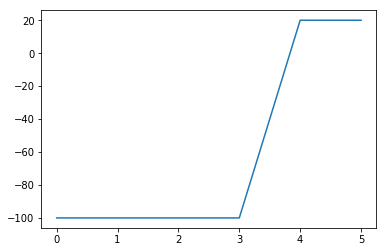

In [35]:
import numpy as np
x = np.arange(iterations)
plt.plot(x, rewardlistimprove)

### Test DP based Policy

In [20]:
episode = []
env.init([0,0])
state = list(env.get_cur_state())
print('Starting State:', state)
rewardlist = []
#print(env.statelist)
for t in range(100):
    probs = policy[env.statelist.index(state)]
    action = np.argmax(probs)
    reward = env.next(action)
    next_state = list(env.get_cur_state())
    #env._s = next_state
    rewardlist.append(reward)
    episode.append((state, action, reward))
    print(episode[t], next_state, probs)
    if env.is_goal():
        print("Hurray")
        break
    state = list.copy(next_state)

Starting State: [0, 0]
([0, 0], 1, -1) [0, 1] [0. 1. 0. 0.]
([0, 1], 1, -1) [0, 2] [0. 1. 0. 0.]
([0, 2], 3, -1) [1, 2] [0. 0. 0. 1.]
([1, 2], 3, -1) [2, 2] [0. 0. 0. 1.]
([2, 2], 1, -1) [2, 3] [0. 1. 0. 0.]
([2, 3], 3, -1) [3, 3] [0. 0. 0. 1.]
([3, 3], 3, -1) [4, 3] [0. 0. 0. 1.]
([4, 3], 1, -1) [4, 4] [0. 1. 0. 0.]
([4, 4], 1, -1) [4, 5] [0. 1. 0. 0.]
([4, 5], 1, -1) [4, 6] [0. 1. 0. 0.]
([4, 6], 3, 30) [5, 6] [0. 0. 0. 1.]
Hurray


# MC Based Policy Iteration on Grid World

In [21]:
def epsilon_greedy_policy(Q, epsilon, nA):
    
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        #print(observation, 'de')
        best_action = np.argmax(Q[tuple(observation)])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [22]:
def mc_control_grid_world(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(len(env._actions)))
    rewardlist = []
    # The policy we're following
    policy = epsilon_greedy_policy(Q, epsilon, len(env._actions))
    
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        env.init([0, 0])
        state = env.get_cur_state()
        rewardsum = 0

        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            reward = env.next(action)
            next_state = env.get_cur_state()
            rewardsum += reward
            episode.append((state, action, reward))
            if env.is_goal():
                break
            state = next_state
        rewardlist.append(rewardsum)
        #print(episode)
        # Find all (state, action) pairs we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        
        for state, action in sa_in_episode:
            sa_pair = (state, action)
            #print(state)
            # Find the first occurance of the (state, action) pair in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if tuple(x[0]) == state and x[1] == action)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])

            returns_count[sa_pair] += 1.0
            Q[state][action] = Q[state][action] + (G - Q[state][action]) / returns_count[sa_pair]
        
        # The policy is improved implicitly by changing the Q dictionary
    
    return Q, policy, rewardlist

In [23]:
Q, policy, rewardlist = mc_control_grid_world(env, num_episodes=5000, epsilon=0.1)

Episode 5000/5000.

### Check agent's progress

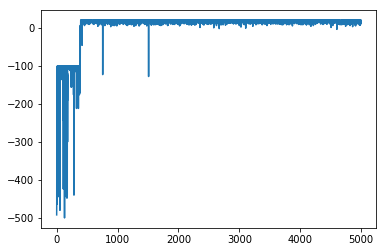

In [24]:
import numpy as np
x = np.arange(5000)
plt.plot(x, rewardlist)

#### State Value

In [25]:
#Calculate State Values
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
V

defaultdict(float,
            {(0, 0): 9.771195310864556,
             (0, 1): -41.8700209643606,
             (1, 0): 12.855627705627702,
             (2, 0): -37.229681978798595,
             (2, 1): -7.752345215759852,
             (3, 0): -60.984848484848484,
             (0, 2): -11.523560209424087,
             (1, 1): 16.419781604367895,
             (1, 2): 19.396126011068507,
             (3, 1): -55.6844919786096,
             (4, 1): -56.33802816901409,
             (4, 0): -61.84210526315789,
             (2, 2): 21.669892473118228,
             (3, 2): -3.8375796178344004,
             (5, 0): -82.4,
             (6, 0): -50.0,
             (2, 3): 23.6525037936267,
             (2, 4): 19.34959349593496,
             (3, 3): 25.030099610220883,
             (4, 3): 26.320825932504448,
             (2, 5): -76.5,
             (1, 5): -6.0,
             (1, 4): -18.0,
             (0, 4): 0.0,
             (0, 5): 0.0,
             (5, 1): -45.909090909090914,
            

### Best Policy

In [26]:
#print policy
for i in env.statelist:
    print(policy(i))

[0.025 0.025 0.025 0.925]
[0.025 0.025 0.025 0.925]
[0.025 0.025 0.025 0.925]
[0.925 0.025 0.025 0.025]
[0.025 0.025 0.025 0.925]
[0.025 0.925 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.025 0.925 0.025 0.025]
[0.025 0.925 0.025 0.025]
[0.025 0.025 0.025 0.925]
[0.925 0.025 0.025 0.025]
[0.025 0.025 0.025 0.925]
[0.025 0.025 0.925 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.025 0.925 0.025 0.025]
[0.025 0.025 0.925 0.025]
[0.025 0.925 0.025 0.025]
[0.025 0.025 0.025 0.925]
[0.925 0.025 0.025 0.025]
[0.025 0.025 0.925 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.025 0.925 0.025 0.025]
[0.025 0.025 0.925 0.025]
[0.025 0.025 0.925 0.025]
[0.025 0.025 0.025 0.925]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.925 0.025 0.025 0.025]
[0.025 0.925 0.025 0.025]
[0.025 0.025 0.925 0.025]
[0.925 0.025

### Test MC based Optimal Policy

In [27]:
episode = []
env.init([0, 0])
state = env.get_cur_state()
rewardlist = []
#print(state)
for t in range(100):
    probs = policy(state)
    action = np.random.choice(np.arange(len(probs)), p=probs)
    #next_state, reward, done, _ = env.step(action)
    reward = env.next(action)
    print(state)
    next_state = env.get_cur_state()
    rewardlist.append(reward)
    episode.append((state, action, reward))
    if env.is_goal():
        break
    state = next_state

[0 0]
[1, 0]
[1, 1]
[1, 2]
[2, 2]
[2, 3]
[3, 3]
[4, 3]
[5, 3]
[5, 4]
[5, 5]


In [28]:
rewardlist

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 30]